In [ ]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Overview {-}
### 1 {-}
The red wine dataset contains 1599 rows of information about the quantitative chemical characteristics of red wines as well as a numeric quality score associated with said wines.


In [49]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# PCA {-}
We can start our analysis by doing PCA analysis with 2 components followed by k-means clustering.

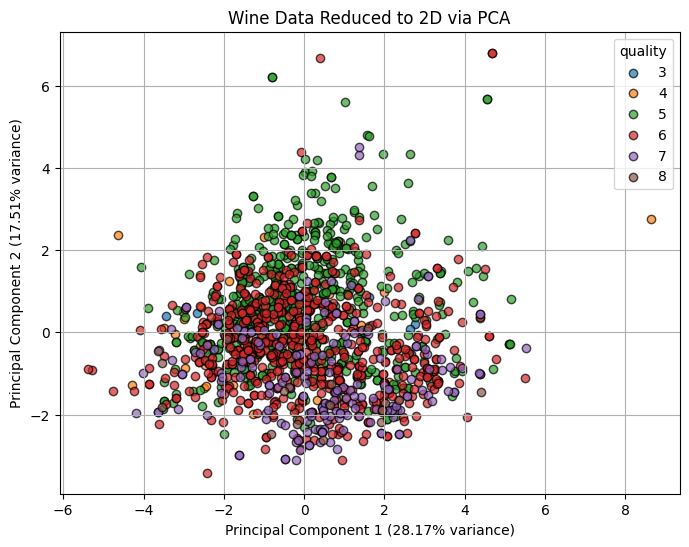

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

nulls = df.isnull().sum()
if nulls.sum() > 0:
    print(nulls)

y = df['quality']
df.pop('quality')
X = df

feature_names = X.columns.to_list()
target_names = ['quality']

scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(df))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
#print("Explained variance by each principal component:")
#print(explained_variance)

target_values = np.unique(y)

X_pca

plt.figure(figsize=(8, 6))
for i, target_value in enumerate(target_values):
    target_indices = np.where(y == target_value)
    pca1 = X_pca[target_indices, 0]
    pca2 = X_pca[target_indices, 1]
    plt.scatter(pca1, pca2, label=target_value, alpha=0.7, edgecolor='k')

plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance)")
plt.title("Wine Data Reduced to 2D via PCA")
plt.legend(title="quality")
plt.grid()
plt.show();

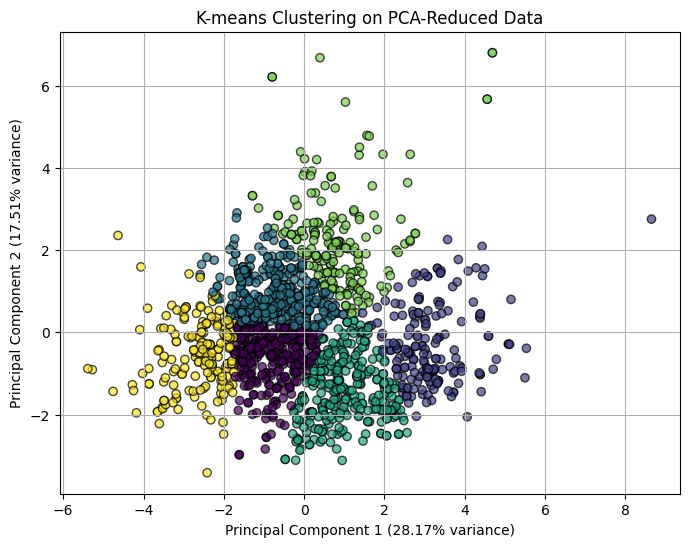

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=30)
kmeans.fit(X_pca)
clusters = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=clusters, alpha=0.7, edgecolor='k'
)

plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance)")
plt.title("K-means Clustering on PCA-Reduced Data")
plt.grid()
plt.show();


In the PCA plot, the data is very scattered, but we find that the quality of data is higher as principle component 2 decreases and lower as principle component 2 increases. After doing k-means clustering with 6 clutsers, we can see some of the areas with the more predominant concentrations of certain quality scores.

### Variance and Dimensionality Tradeoff{-}
We find that principle component one explains 28.17% of the variance and principle component two explains 17.51% of the variance. While PCA analysis has made it clear there is some kind of trend with the change in quality given changes in principle components, it is not clear exactly what variables and what interactions of those variables might be driving the trend we can see. That is just a consequence of the loss of information that dimensiuonality reduction brings.

# T-SNE {-}

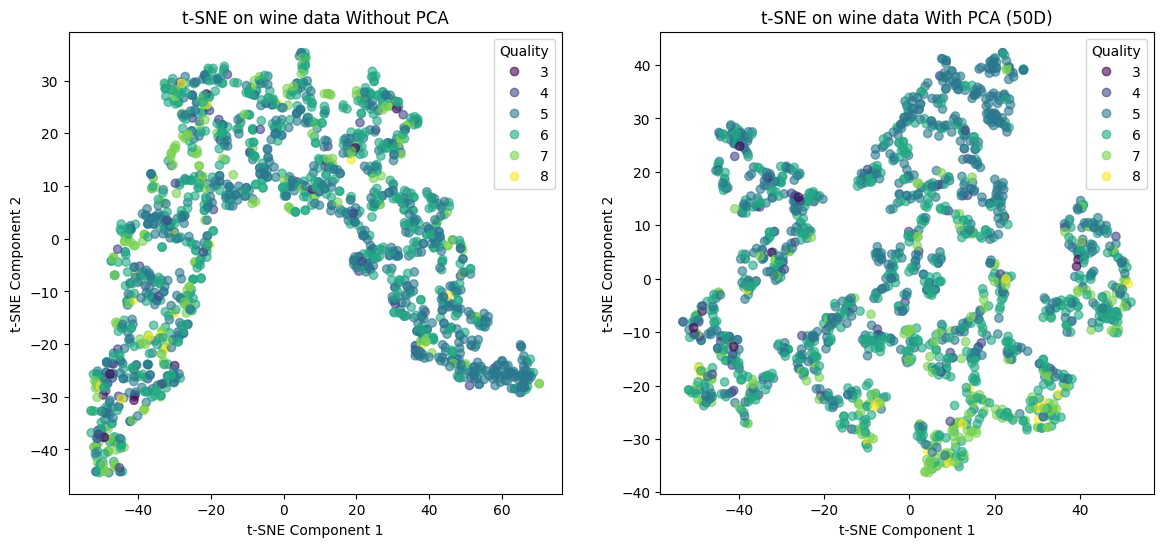

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_no_pca = tsne.fit_transform(X)
X_tsne_pca = tsne.fit_transform(X_pca)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

s1 = ax[0].scatter(X_tsne_no_pca[:, 0], X_tsne_no_pca[:, 1], c=y, cmap="viridis", alpha=0.6)
ax[0].set_title("t-SNE on wine data Without PCA")
ax[0].set_xlabel("t-SNE Component 1")
ax[0].set_ylabel("t-SNE Component 2")
ax[0].legend(*s1.legend_elements(), title="Quality")

s2 = ax[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y, cmap="viridis", alpha=0.6)
ax[1].set_title("t-SNE on wine data With PCA (50D)")
ax[1].set_xlabel("t-SNE Component 1")
ax[1].set_ylabel("t-SNE Component 2")
ax[1].legend(*s2.legend_elements(), title="Quality");

### Compare with PCA {-}
T-SNE produces very different plots due to not focusing on maximizing the variance of the data. While it takes longer to run on the wine data-set, we see interesting clustering patterns. The data at appears less randomly scattered than the PCA plot and the clusters seem more definite. The pre-PCA data has a very clear curve shape, and the post-PCA data has very clear blob clusters, where the average quality within those blobs is higher on one end of the plot than the other. This makes it much clearer to see how quality is affected as the t_SNE components change.

### Data dimensionality {-}
PCA breaks data into lower dimensional components to make larger sets of data easy to visualize and process, where features are decorrelated and variance is maximized. T-sne on the other hand keeps points closer together rather than focusing on variance, and the main benefit of this is that visual patterns will be well presented in a lower space than compared to PCA.